# Cardiovascular Disease Detection

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df=pd.read_csv('cardio_train.csv',sep=';')

In [3]:
#check shape
df.shape

(69301, 13)

dataset contain 69301 rows and 13 column

In [4]:
#first 5 rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
#check the null values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
#dataset doesn't contain null values

In [8]:
#check the datatypes
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

as we can see except weight column everything in float

In [9]:
#lets check corr
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


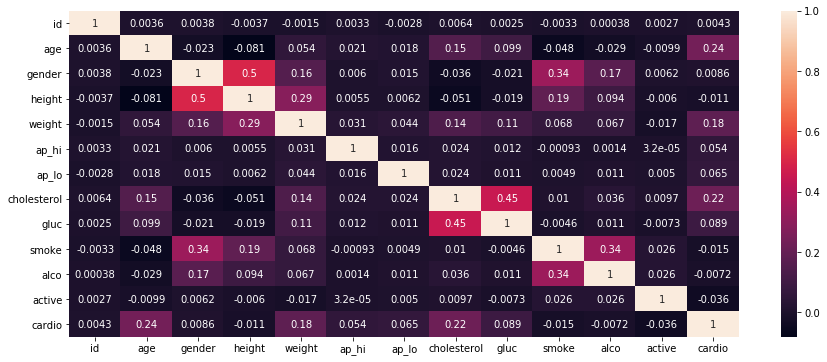

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [11]:
#lets analyze column
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [12]:
#lets analyze column
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [13]:
#lets analyze column
df['active'].value_counts()

1    55717
0    13584
Name: active, dtype: int64

In [14]:
#lets analyze column
df['alco'].value_counts()

0    65567
1     3734
Name: alco, dtype: int64

In [15]:
#lets analyze column
df['smoke'].value_counts()

0    63199
1     6102
Name: smoke, dtype: int64

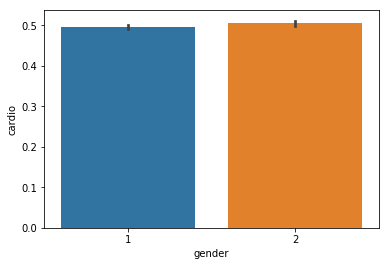

In [16]:
sns.barplot(x='gender',y='cardio',data=df)

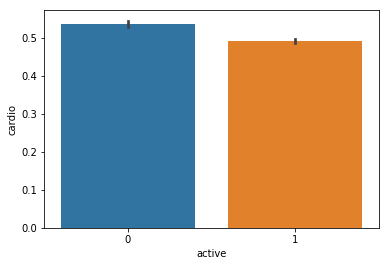

In [17]:
sns.barplot(x='active',y='cardio',data=df)

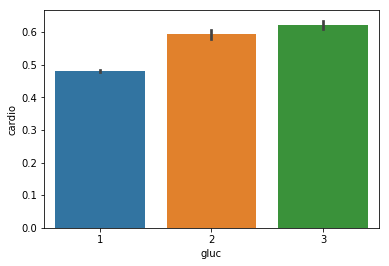

In [18]:
sns.barplot(x='gluc',y='cardio',data=df)

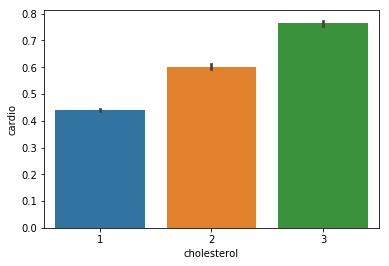

In [19]:
sns.barplot(x='cholesterol',y='cardio',data=df)

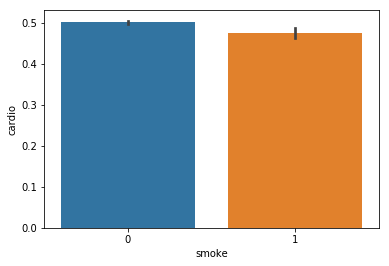

In [20]:
sns.barplot(x='smoke',y='cardio',data=df)

In [21]:
#check the skewness
df.skew()

id             -0.001317
age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [22]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

C:\Users\manish.d.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


In [23]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [24]:
#split the data
x=df.drop(['id','cardio'],axis=1)
y=df['cardio']

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)


array([[ 1.21609889, -0.73299543, -1.14097701, ..., -0.3107481 ,
        -0.23865525,  0.49375486],
       [-1.95404852, -0.73299543, -0.16603029, ..., -0.3107481 ,
        -0.23865525,  0.49375486],
       [ 0.98586698, -0.73299543,  0.07770639, ..., -0.3107481 ,
        -0.23865525,  0.49375486],
       ...,
       [-0.16326585,  1.36426498,  2.2713365 , ..., -0.3107481 ,
         4.19014453, -2.02529651],
       [ 1.20069605, -0.73299543, -0.16603029, ..., -0.3107481 ,
        -0.23865525, -2.02529651],
       [ 0.43420215, -0.73299543,  0.68704809, ..., -0.3107481 ,
        -0.23865525,  0.49375486]])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def max_f1_score(clf,x,y):
    max_f_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y,test_size=.2)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        score=f1_score(y_pred,y_test)
        if score>=max_f_score:
            max_f_score=score
            final_r_state=r_state
            
    print(clf,'max f1 score is',final_r_state,'is',max_f_score)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model=[LogisticRegression(),DecisionTreeClassifier()]
for m in model:
    max_f1_score(m,x,y)
    print(m)
    print("Mean f1 score for: ",m,cross_val_score(m,x,y,cv=5,scoring="f1").mean())
    print("standard deviation in f1 score for : ",m,cross_val_score(m,x,y,cv=5,scoring="f1").std())
    print(cross_val_score(m,x,y,cv=5,scoring="f1"))
    print('*********************')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) max f1 score is 56 is 0.6448184233835252
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Mean f1 score for:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 0.6263723157600889
standard deviation in f1 score for :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          

In [28]:
#Lets use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [29]:

#Lets use random forest classifier
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
lg = RandomForestClassifier(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('f1_score:\n',f1_score(y_test,y_pred))

print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))




f1_score:
 0.7064523232768113
confusion_matrix:
 [[5048 1932]
 [2067 4812]]
classification_report:
              precision    recall  f1-score   support

          0       0.71      0.72      0.72      6980
          1       0.71      0.70      0.71      6879

avg / total       0.71      0.71      0.71     13859



In [30]:
print("Mean f1 score for random forest  classifier: ",cross_val_score(lg,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(lg,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg,x,y,cv=5,scoring="f1"))

Mean f1 score for random forest  classifier:  0.7136835573822864
standard deviation in f1 score for random forest classifier:  0.0029300240845470606
[0.71191642 0.71818447 0.7120979  0.71360886 0.70909886]


In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
41345,1,1
1213,0,0
63101,1,1
64009,1,0
65694,0,0


In [32]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lg, 'cardio.pkl') 

['cardio.pkl']

In [38]:
from sklearn.externals import joblib 
import pickle
  
# Save the model as a pickle in a file 
saved_model=pickle.dumps(lg) 
pickle.loads(saved_model) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
# Creating a pickle file for the classifier 
pickle.dump(lg, open('cardio1.pkl', 'wb'))